# US-India YouTube 2021 Trending Video Comparison (Part 1)

pennkey: angelzyt

## Importing Packages and Configurations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import numpy as np
from collections import Counter
import wordcloud
from PIL import Image
import re

In [2]:
def plot_conf(ax, xlbl='', ylbl='', t='', back_color='#ffffff',
              text_color='#616161', grid_color='#e9e9e9', 
              tick_color='', ticklbl_size=13, lbl_size=13, lang='en'):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor(back_color)
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor=text_color, color=back_color)
    if tick_color != '':
        ax.tick_params(axis='both', color=tick_color)
    ax.tick_params(axis='both', which='major', labelsize=ticklbl_size)
    # adding a grid and specifying its color
    ax.grid(True, color=grid_color)
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color(back_color)
    ax.spines['top'].set_color(back_color) 
    ax.spines['right'].set_color(back_color)
    ax.spines['left'].set_color(back_color)
    # setting the title, x label, and y label of the plot
    if lang == 'ar':
        ax.set_title(get_display(reshaper.reshape(t)), fontweight='bold', family='Amiri',
                     fontsize=14, color=text_color, loc='right', pad=24);
        ax.set_xlabel(get_display(reshaper.reshape(xlbl)), fontweight='bold', family='Amiri',
                      labelpad=16, fontsize=lbl_size, color=text_color, fontstyle='italic');
        ax.set_ylabel(get_display(reshaper.reshape(ylbl)), fontweight='bold', family='Amiri',
                      color=text_color, labelpad=16, fontsize=lbl_size, fontstyle='italic');
    else:
        ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
        ax.set_xlabel(xlbl, labelpad=16, fontsize=lbl_size, color='#616161', fontstyle='italic');
        ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=lbl_size, fontstyle='italic');

us_col = '#011F5B'

india_col='#990000'

## Reading and Combining Datasets

In [3]:
us=pd.read_csv('US_youtube_trending_data-2.csv')
india=pd.read_csv('IN_youtube_trending_data.csv')

In [4]:
import json
a= open('US_category_id.json')
data_us= json.load(a)

b= open('IN_category_id.json')
data_in= json.load(b)

In [5]:
# Extract category and ID
title_us=[]
id_us=[]
for i in range(len(data_us['items'])):
  title_us.append(data_us['items'][i]['snippet']['title'])
  id_us.append(data_us['items'][i]['id'])

title_in=[]
id_in=[]
for i in range(len(data_in['items'])):
  title_in.append(data_in['items'][i]['snippet']['title'])
  id_in.append(data_in['items'][i]['id'])

In [6]:
# Transform category list to df
us_category= {
    'id': id_us,
    'title': title_us}
us_category_df = pd.DataFrame(us_category)

in_category= {
    'id': id_in,
    'title': title_in}
in_category_df = pd.DataFrame(in_category)

In [7]:
# Merge category id and category
us_category_df['id']=pd.to_numeric(us_category_df['id'])
in_category_df['id']=pd.to_numeric(in_category_df['id'])

us_all=pd.merge(us,us_category_df,left_on='categoryId',right_on='id',how='left')
india_all=pd.merge(india,in_category_df,left_on='categoryId',right_on='id',how='left')

# Limit time for 2021
us_all['trending_date'] = pd.to_datetime(us_all['trending_date'])
us_all= us_all[(us_all['trending_date'] >= '2021-01-01') & (us_all['trending_date'] <= '2021-12-03')]

india_all['trending_date'] = pd.to_datetime(india_all['trending_date'])
india_all= india_all[(india_all['trending_date'] >= '2021-01-01') & (india_all['trending_date'] <= '2021-12-03')]

## Sub-task 3: Among trending videos in the US, what are the distributions and characteristics of top 30 most viewed videos ? How are the likes and comment counts distributed? What are the response rate of those videos ?

### US

In [83]:
us_all

video_id  \
27596  2IQ4Kr-SnU0   
27597  p19cjKg8dIc   
27598  wW-KBzKWvrU   
27599  fn3KWM1kuAw   
27600  nlGllxnSfgA   
...            ...   
96786  AV1gnTSOsNk   
96787  Mu06fXlmj6Q   
96788  kh8qx2Ewlcc   
96789  rjB2gp0r2p8   
96790  BxqvarOu_Ys   

                                                                                                 title_x  \
27596  The Stunning Conclusion to an Amazing Tribute Show | AEW Brodie Lee Celebration of Life, 12/30/20   
27597                                                                 goodbye california. a new chapter.   
27598                                                            Concerning the Wendigo doll: An Apology   
27599                                                                                    Do You Love Me?   
27600                       AMONG US W/ CORPSE, JAMES, ADDISON, BRETMAN, KARL, GEORGE, POKI, AND MORE :)   
...                                                                                                  ...   
96786                                                                                             Fired?   
96787                                                MY PREGNANT WIFE WAS HOSPITALIZED | TRENT AND ALLIE   
96788                                       PISTONS at LAKERS | FULL GAME HIGHLIGHTS | November 28, 2021   
96789                                                    Vikings vs. 49ers Week 12 Highlights | NFL 2021   
96790                                    WARRIORS at CLIPPERS | FULL GAME HIGHLIGHTS | November 28, 2021   

                publishedAt                 channelId         channelTitle  \
27596  2020-12-31T03:58:51Z  UCFN4JkGP_bVhAdBsoV9xftA  All Elite Wrestling   
27597  2020-12-30T16:58:08Z  UCcgVECVN4OKV6DH1jLkqmcA            Jake Paul   
27598  2020-12-31T09:16:45Z  UCitKV0ebZVbtU2nIPihDGMQ          Dollightful   
27599  2020-12-29T18:51:48Z  UC7vVhkEfw4nOGp8TyDk7RcQ      Boston Dynamics   
27600  2020-12-30T04:37:38Z  UCt_DaLB_NDqPVxezyvcfRtg               LARRAY   
...                     ...                       ...                  ...   
96786  2021-11-27T18:00:07Z  UC3Np7DUewV3LhtmR8BVDrCQ         Dani Razooqi   
96787  2021-11-29T14:00:15Z  UCwh2SF7McSUf1GVFVk0nP8w        Trent & Allie   
96788  2021-11-29T05:04:30Z  UCWJ2lWNubArHWmf3FIHbfcQ                  NBA   
96789  2021-11-29T00:44:41Z  UCDVYQ4Zhbm3S2dlz7P1GBDg                  NFL   
96790  2021-11-28T23:01:50Z  UCWJ2lWNubArHWmf3FIHbfcQ                  NBA   

       categoryId             trending_date  \
27596          24 2021-01-01 00:00:00+00:00   
27597          22 2021-01-01 00:00:00+00:00   
27598          24 2021-01-01 00:00:00+00:00   
27599          28 2021-01-01 00:00:00+00:00   
27600          22 2021-01-01 00:00:00+00:00   
...           ...                       ...   
96786          24 2021-12-03 00:00:00+00:00   
96787          22 2021-12-03 00:00:00+00:00   
96788          17 2021-12-03 00:00:00+00:00   
96789          17 2021-12-03 00:00:00+00:00   
96790          17 2021-12-03 00:00:00+00:00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                         tags  \
27596               All Elite Wrestling|AEW|The Young Bucks|Cody Rhodes|Brandi Rhodes|Nick Jackson|Matt Jackson|Chris Jericho|Pro Wrestling|Kenny Omega|Being the Elite|Jon Moxley|Luchasaurus|Jungle Boy|Jack Perry|MOX|AEW DYNAMITE HIGHLIGHTS|#AEWDYNAMITE|AEW ON TNT|AEWonTNT|Jurassic Express|Jake Hager|Inner Circle|Join Dark Order|Rusev|Miro|AEW Dynamite|#AEW|DON CALLIS|Video Games|Music Video|Among Us|Sting|AEW Sting|WCW Sting|the icon sting|man called sting   
27597           

In [90]:
# US Data example
us_all.head(1).T.to_csv('us_data_example.csv')

### US Trending videos dataset with all numerical metrics

In [9]:
## US
# Get Trending days
us_df1=pd.DataFrame(us_all.groupby('title_x').size().sort_values(ascending=False))

# Get data by unique title
us_df2=us_all.groupby('title_x').sum().sort_values(by='view_count',ascending=False)

# Merge trending days and unique title
us_df3=pd.merge(
    us_df2,us_df1,left_index=True, right_index=True, how='left'
    ).rename(
    columns={0:'trending_days'}).sort_values(
    by=['view_count','trending_days'],ascending=False)
us_df3=us_df3.reset_index()

# Get unique category
us_all2=us_all[['video_id','title_x','title_y','tags']].drop_duplicates(subset='title_x',keep='first')

# Merge all with unique category
us_df4=pd.merge(us_df3,us_all2,on='title_x',how='left')[['title_x',
                                                         'view_count',
                                                         'likes',
                                                         'dislikes',
                                                         'comment_count',
                                                         'trending_days',
                                                         'title_y',
                                                         'video_id',
                                                         'tags']].rename(columns={'title_y':'category'})
us_df4['response_rate']=(us_df4['comment_count']+us_df4['likes']+us_df4['dislikes'])/us_df4['view_count']
us_df4['response_rate']=us_df4['response_rate'].map("{:.2%}".format)

us_df4.head(50).to_csv('us_df4-top50.csv')
us_df4

title_x  view_count  \
0                    Turn into orbeez - Tutorial #Shorts  5640301234   
1                    Adele - Easy On Me (Official Video)  1760774068   
2      SPIDER-MAN: NO WAY HOME - Official Teaser Trai...  1471277143   
3                               My hidden talent #shorts  1452140141   
4      India claim stunning series win, end Australia...  1201206446   
...                                                  ...         ...   
12307  Gay And Not Proud - Daniel Howell | YouTube Pr...           0   
12308            Introducing the shorter side of YouTube           0   
12309  Demi Lovato performs their greatest hits this ...           0   
12310               The Funeral of The Duke of Edinburgh           0   
12311  Watch The Weeknd and create short videos on th...           0   

           likes  dislikes  comment_count  trending_days        category  \
0      189617847   6167736          74974             36   Entertainment   
1       70482598    790723        3821932             18           Music   
2       63080849    430664        3818828             24   Entertainment   
3       47131264    944115          82208             20          Comedy   
4       26718566    831123        1737039             34          Sports   
...          ...       ...            ...            ...             ...   
12307          0         0           6784              5   Entertainment   
12308      85591      6380              0              4       Education   
12309          0         0            564              4   Entertainment   
12310          0         0              0              1  People & Blogs   
12311      50071      7256              0              1       Education   

          video_id                                               tags  \
0      hdmx71UjBXs                                             [None]   
1      U3ASj1L6_sY  There ain’t no gold|In this river|That I’ve be...   
2      rt-2cxAiPJk  spiderman|spiderman no way home|spider-man|spi...   
3      O2W2gUXAt78  shorts|#shorts|zach king|magic|tiktok|dance|fe...   
4      wY6UyatwVTA  Australia|India|day five|fourth Test|Gabba|hig...   
...            ...                                                ...   
12307  ifJYb2An7wE  Pride|Pride 2021|YouTube Pride|YouTube Pride 2...   
12308  Hb3rmh-_FMw                                             [None]   
12309  kmk5vciFbek  Pride|Pride 2021|YouTube Pride|YouTube Pride 2...   
12310  mCY4b6GGkb4                                             [None]   
12311  HcSwBJY7Xew                                             [None]   

      response_rate  
0             3.47%  
1             4.26%  
2             4.58%  
3             3.32%  
4             2.44%  
...             ...  
12307          inf%  
12308          inf%  
12309          inf%  
12310          nan%  
12311          inf%  

[12312 rows x 10 columns]

In [10]:
us_df5=us_df4[['view_count','category']].head(50)
us_df5.groupby('category').size()

category
Comedy                   2
Education                1
Entertainment           16
Film & Animation         1
Gaming                   1
Music                   20
News & Politics          1
People & Blogs           3
Science & Technology     1
Sports                   4
dtype: int64

In [13]:
print(us_df4['view_count'].quantile(0.9))
print(us_df4['likes'].quantile(0.9))
print(us_df4['comment_count'].quantile(0.9))

29771489.099999998
1649572.9
111310.09999999986


### Ploting numerical metrics

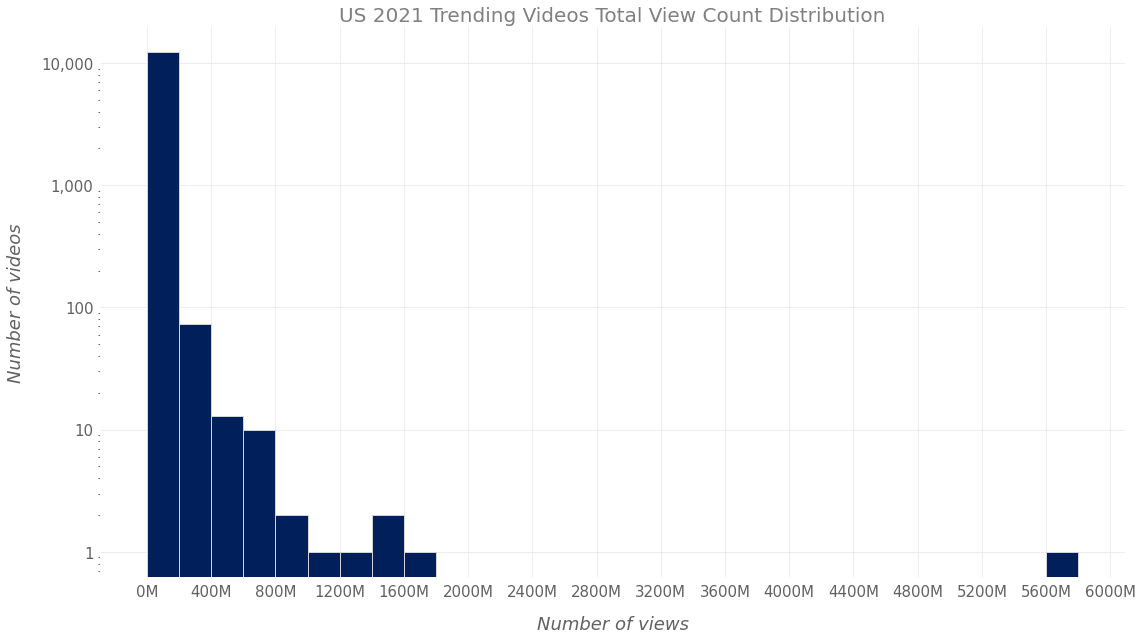

In [15]:
# plot view count 
ax = us_df4['view_count'].plot(kind='hist',bins=np.arange(0, 60e8, 2e8)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=us_col);
plot_conf(ax, xlbl='Number of views', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('US 2021 Trending Videos Total View Count Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(400000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('us_view.png',dpi=300)

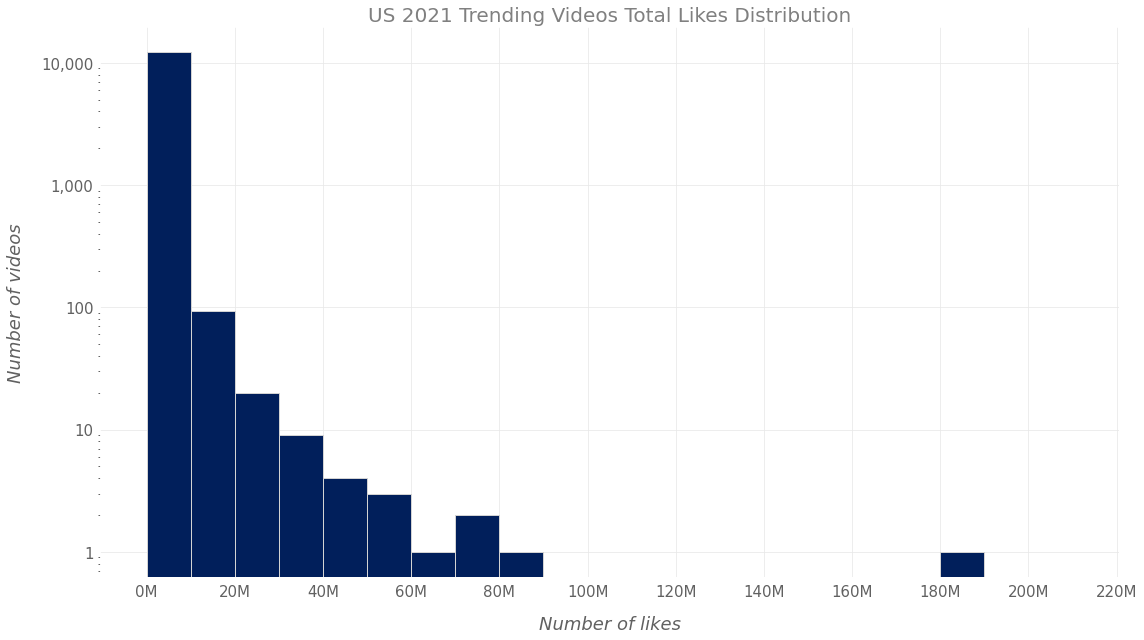

In [16]:
# plot likes count 
ax = us_df4['likes'].plot(kind='hist', bins=np.arange(0, 220e6, 10e6)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=us_col);
plot_conf(ax, xlbl='Number of likes', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('US 2021 Trending Videos Total Likes Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('us_likes.png',dpi=300)

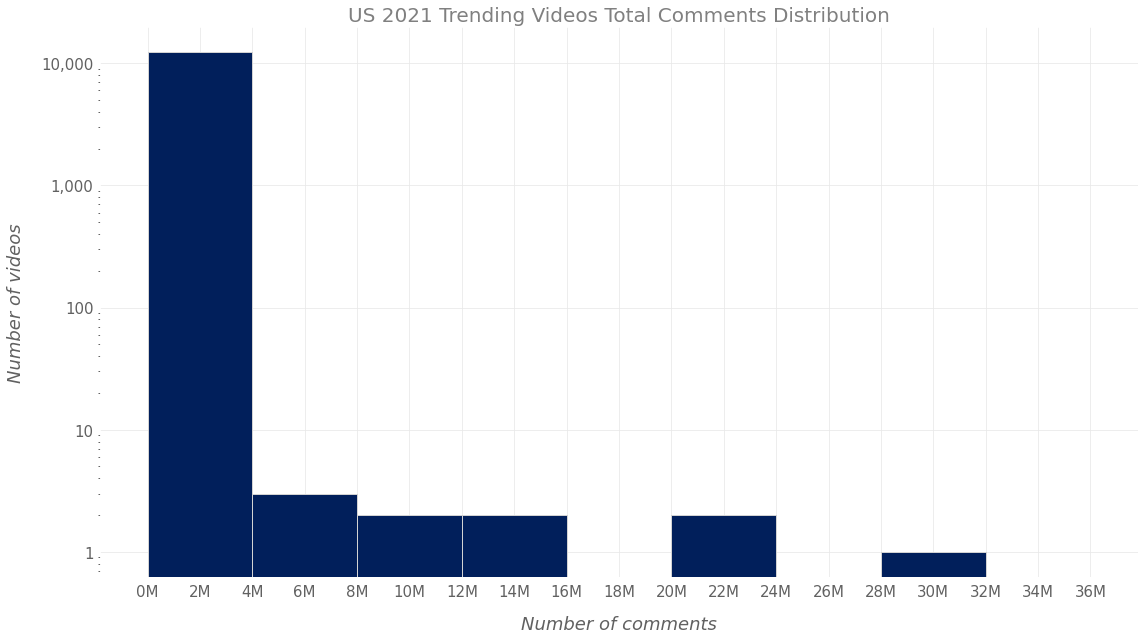

In [17]:
# plot comment count 
ax = us_df4['comment_count'].plot(kind='hist', bins=np.arange(0, 40e6, 4e6)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=us_col);
plot_conf(ax, xlbl='Number of comments', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('US 2021 Trending Videos Total Comments Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('US_comments.png',dpi=300)

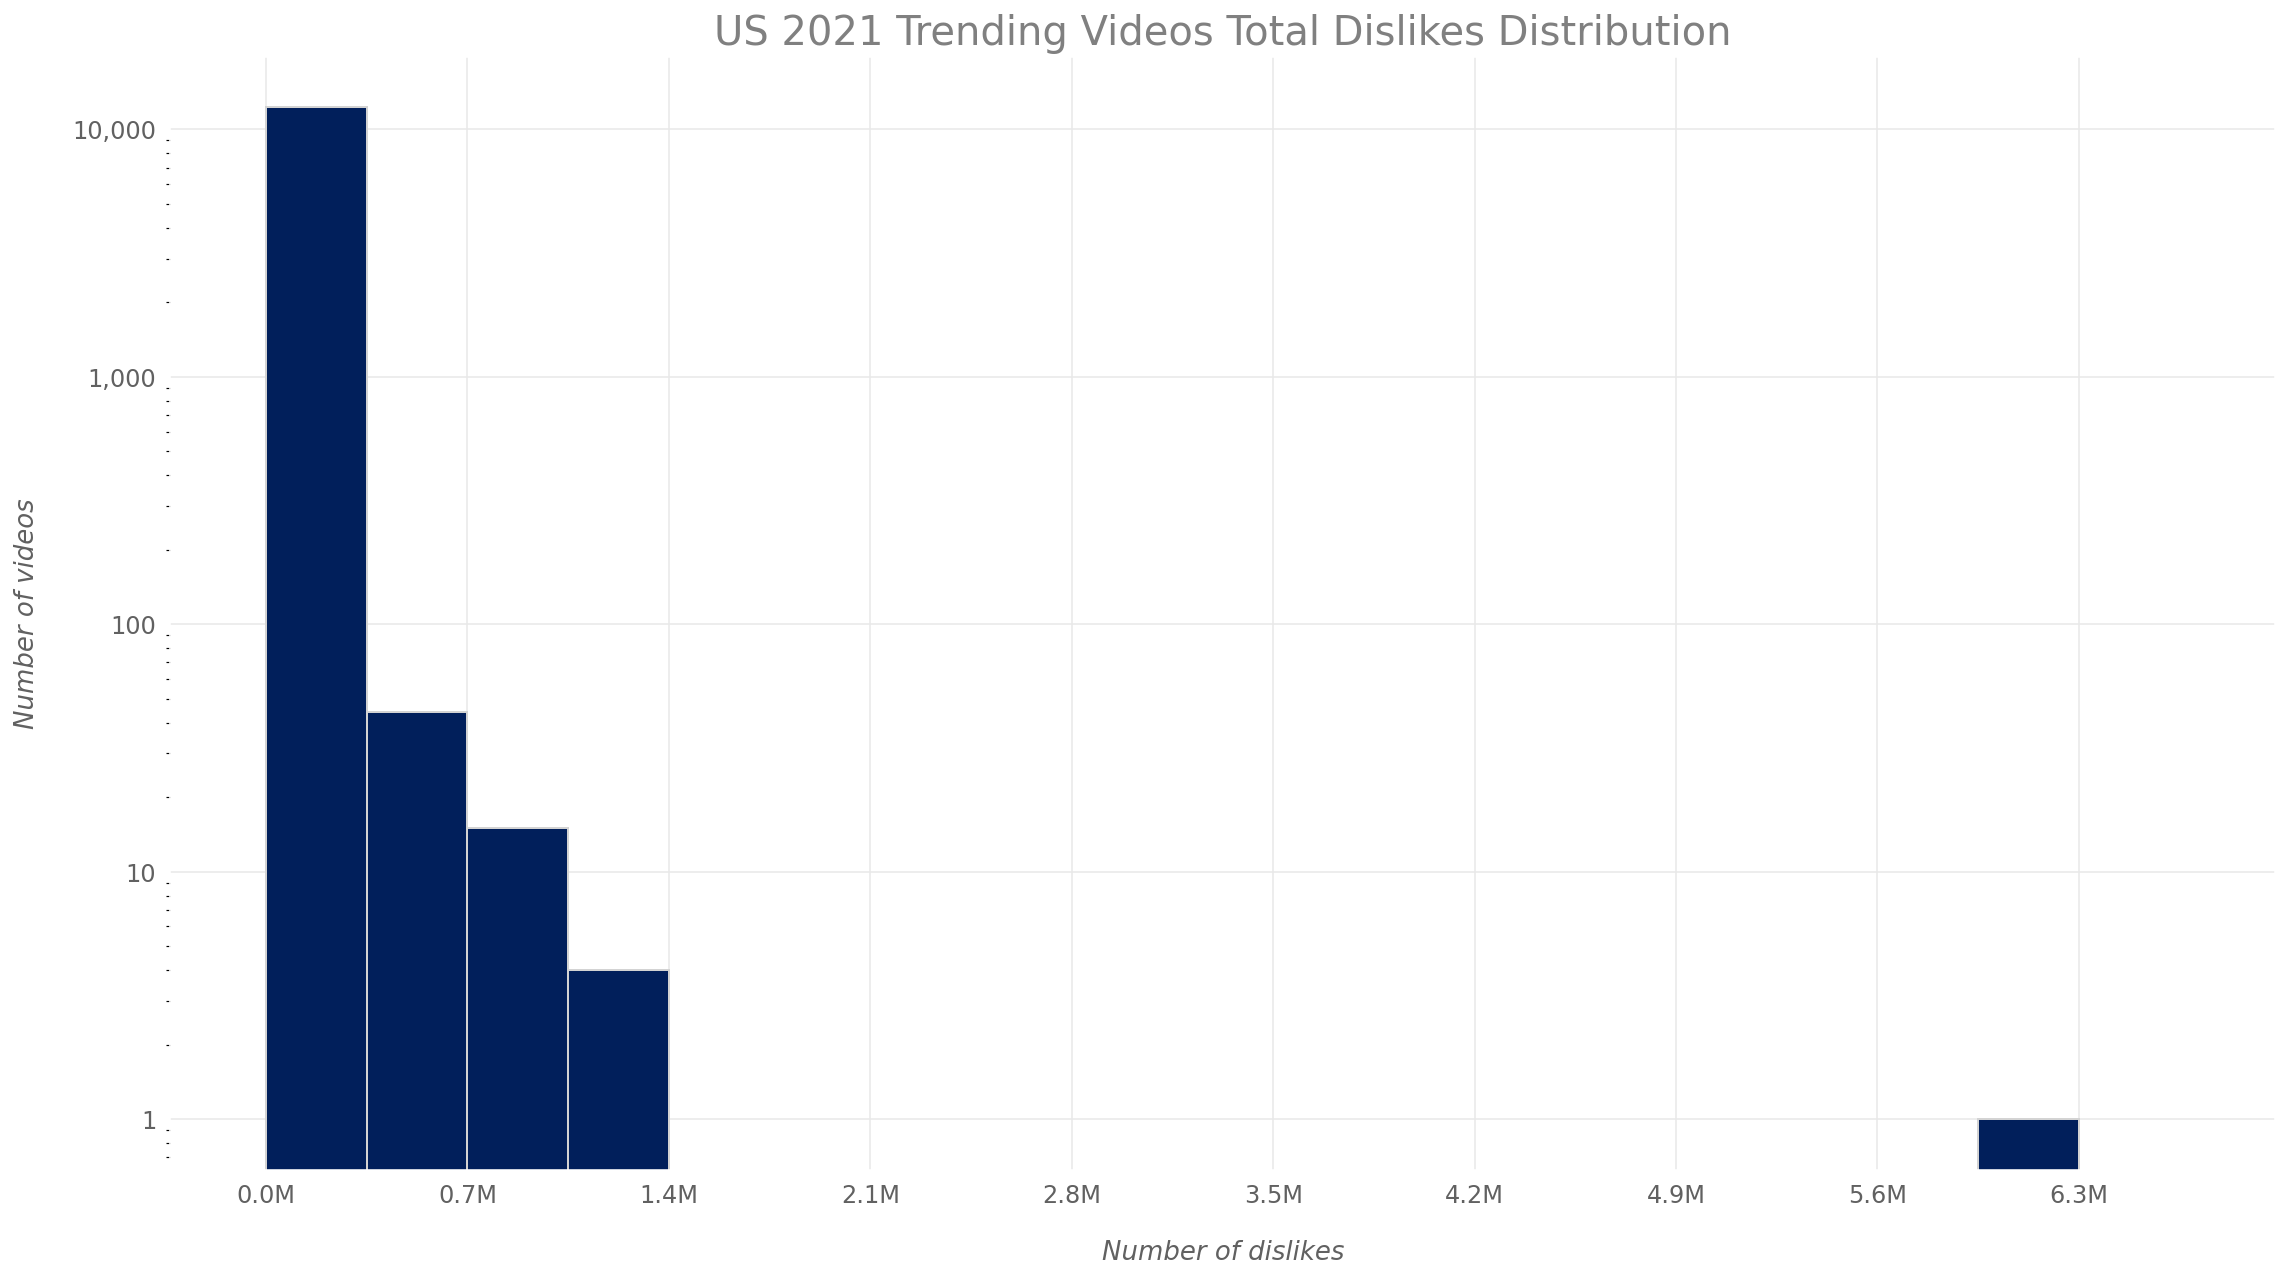

In [54]:
# plot dislikes count 
ax = us_df4['dislikes'].plot(kind='hist',bins=np.arange(0, 7e6, 3.5e5)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=us_col);
plot_conf(ax, xlbl='Number of dislikes', ylbl='Number of videos',ticklbl_size=12, lbl_size=13)
title_obj=plt.title('US 2021 Trending Videos Total Dislikes Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(700000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('US_dislikes.png',dpi=300)

## India

### US Trending videos dataset with all numerical metrics

In [18]:
## India
# Get Trending days
india_df1=pd.DataFrame(india_all.groupby('title_x').size().sort_values(ascending=False))

# Get data by unique title
india_df2=india_all.groupby('title_x').sum().sort_values(by='view_count',ascending=False)

# Merge trending days and unique title
india_df3=pd.merge(
    india_df2,india_df1,left_index=True, right_index=True, how='left'
    ).rename(
    columns={0:'trending_days'}).sort_values(
    by=['view_count','trending_days'],ascending=False)
india_df3=india_df3.reset_index()

# Get unique category
india_all2=india_all[['video_id','title_x','title_y','tags']].drop_duplicates(subset='title_x',keep='first')

# Merge all with unique category
india_df4=pd.merge(india_df3,india_all2,on='title_x',how='left')[['title_x',
                                                         'view_count',
                                                         'likes',
                                                         'dislikes',
                                                         'comment_count',
                                                         'trending_days',
                                                         'title_y',
                                                          'video_id',
                                                          'tags']].rename(columns={'title_y':'category'})
india_df4['response_rate']=(india_df4['comment_count']+india_df4['likes']+india_df4['dislikes'])/india_df4['view_count']
india_df4['response_rate']=india_df4['response_rate'].map("{:.2%}".format)
india_df4.head(50).to_csv('india_df4-top50.csv')
india_df4.head(50)

title_x  view_count     likes  \
0   KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena ...  1495945829  75880519   
1   Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...  1366495429  32956354   
2             Paytm IPL 2021 Ad - The Salon (English)  1327627464     16690   
3       BTS (방탄소년단) 'Permission to Dance' Official MV  1080130335  94008261   
4                    Turn into egg - Tutorial #Shorts   961205962  31703110   
5                                 LISA - 'LALISA' M/V   954306098  74742197   
6                  She is foxy but not enough #Shorts   876755282  30084547   
7                When the cheating went wrong #Shorts   825267526  24506725   
8   Badshah - Paani Paani | Jacqueline Fernandez |...   757873239  13952000   
9   Guru Randhawa: Nain Bengali (Official Video) D...   750886955   5794966   
10  Bachpan Ka Pyaar (Official Video) Badshah, Sah...   682669183  39577078   
11  Don’t be Oversmart 😎 ~ You Can’t Change your D...   679024854  28123126   
12                   BTS (방탄소년단) 'Butter' Official MV   631898950  50695472   
13          Aise kon Chori karta hai🙄 #imkavy #Shorts   615530918   6130076   
14  Bedardi Se Pyaar Ka Song|Jubin N,Meet B,Manoj ...   571463247  23038845   
15      JELLY FRUIT 🍎 CHALLENGE @BrianaSprinz #Shorts   550519248  12606062   
16  Why Children are considered as Gifts of Gods 🕉...   528262917  26437119   
17                  $456,000 Squid Game In Real Life!   522153618  48577399   
18  Let's just have fun with your loved ones!😎 #Pe...   517539612  42016808   
19                             TWICE Alcohol-Free M/V   511279379  23540824   
20  isko mere chupaye hue pese hmesha mil jate h 😂...   507034012   9732113   
21                      Crazy STATIC TRICK! 😨 #shorts   495982721  17098232   
22  Chhor Denge: Parampara Tandon | Sachet-Parampa...   484914950  16023486   
23                         ROSÉ - 'On The Ground' M/V   483786259  42210749   
24                Turn into orbeez - Tutorial #Shorts   483433094  17812545   
25  Join the BTS #PermissiontoDance Challenge only...   480211776         0   
26  Surja Ki Mashoor Dal🤩🤩 Most Eco Friendly Food❤...   478364165   7371928   
27             Monster vs Dad. Dednahype show #shorts   468321441  14982501   
28                EXO 엑소 'Don't fight the feeling' MV   460228759  40027708   
29  Lut Gaye (Full Song) Emraan Hashmi, Yukti | Ju...   447063573  14409338   
30  America 🇺🇸 Vs India 🇮🇳 ~ When going out from h...   432393264  20324395   
31  Baarish Ban Jaana (Official Video) Payal Dev, ...   431597775  12625723   
32  Saiyaan Ji ► Yo Yo Honey Singh, Neha Kakkar|Nu...   428315842  20660474   
33                  Money Plinko Challenge! 💰 #shorts   426497234  11475143   
34  Insaniyat shayad ab bachho me he rah gai hai 😭...   419660572  23787422   
35                                        Oh No.... 😂   418777433  11692490   
36  Dil Galti Kar Baitha Hai | Meet Bros Ft. Jubin...   418274871  18083727   
37                      8 Year Old Loses His Mind! 🤣😱   416190700  15608243   
38  Heart touching plz end tak zarur dekhna💔😭 #tre...   410060858  24882105   
39  Dance your 💜 out to #PermissiontoDance 💃🕺 Only...   404229895  37573835   
40  Seeti Maar | Radhe - Your Most Wanted Bhai | S...   404019531   5835339   
41  Doob Gaye (Official Video) Guru Randhawa | Urv...   400746223   7386447   
42  Jiska koi nhi hota uska khuda hota hai 😘😘 #sho...   396559689  21200217   
43    Dednahype show Part 2.Meet the Monster. #shorts   392903356  19398667   
44  It ends brutally 😂 #thatlittlepuff #recipe #pu...   392098933  19047778   
45  Nadiyon Paar (Let the Music Play) – Roohi | Ja...   391809073   5024552   
46  Kya aap mante ho .. ki dil se Amir hona chaiye...   390323709  13608142   
47                           My hidden talent #shorts   380402780  12430156   
48  Barsaat Ki Dhun Song | Rochak K Ft. Jubin N | ...   374574912  12188025   
49    BTS (방탄소년단) 'Butter' Official MV (Hotter Remix)   373194417  49227759   

    dislikes  co

In [56]:
india5=india_df4[['view_count','category']].head(50)
india5.groupby('category').size()

category
Comedy             5
Education          1
Entertainment     15
Gaming             1
Music             23
People & Blogs     5
dtype: int64

In [19]:
print(india_df4['view_count'].quantile(0.5))
print(india_df4['likes'].quantile(0.9))
print(india_df4['comment_count'].quantile(0.9))

2379373.5
998326.9999999998
52326.499999999985


### Ploting numerical metrics

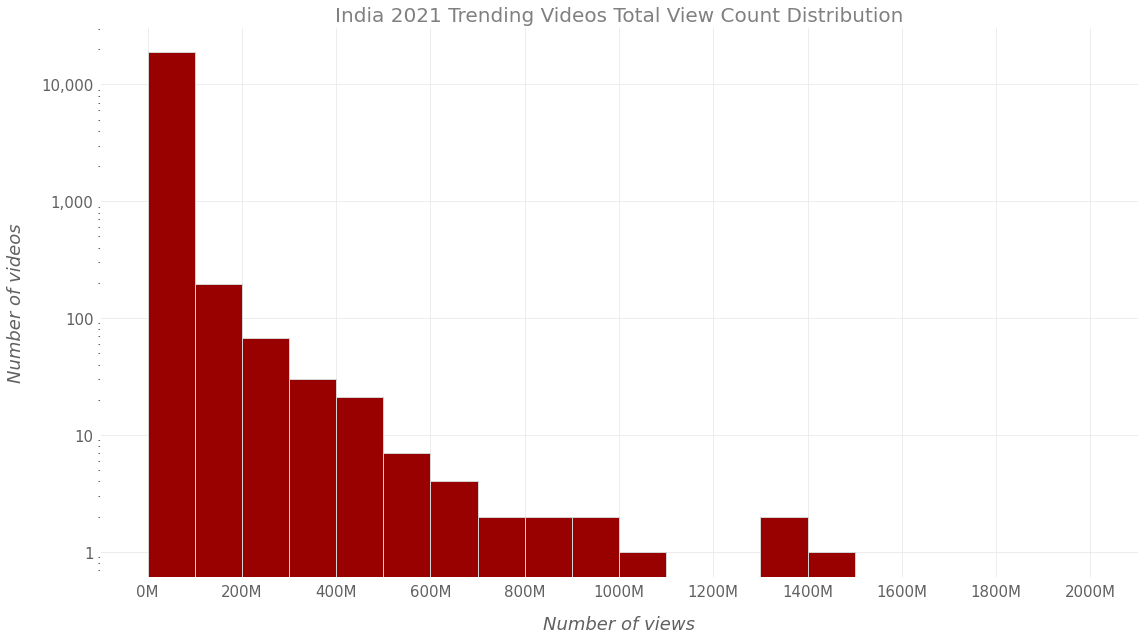

In [20]:
# plot view count 
ax = india_df4['view_count'].plot(kind='hist',bins=np.arange(0, 21e8, 1e8)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=india_col);
plot_conf(ax, xlbl='Number of views', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('India 2021 Trending Videos Total View Count Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(200000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('india_views.png',dpi=300)

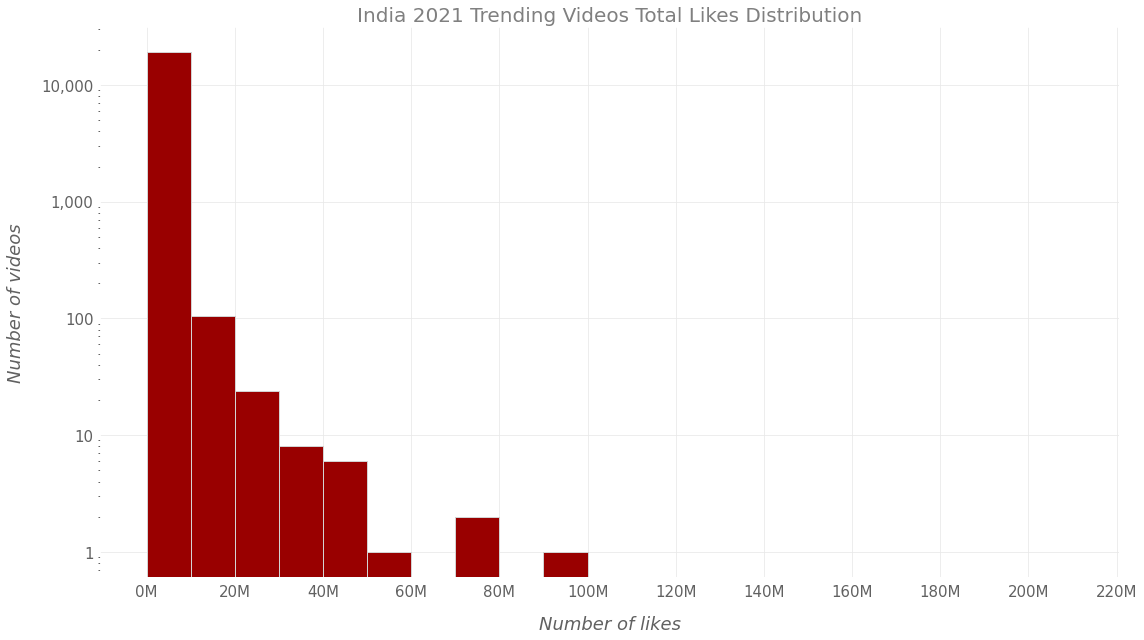

In [21]:
# plot like count 
ax = india_df4['likes'].plot(kind='hist', bins=np.arange(0, 220e6, 10e6)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=india_col);
plot_conf(ax, xlbl='Number of likes', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('India 2021 Trending Videos Total Likes Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('india_likes.png',dpi=300)

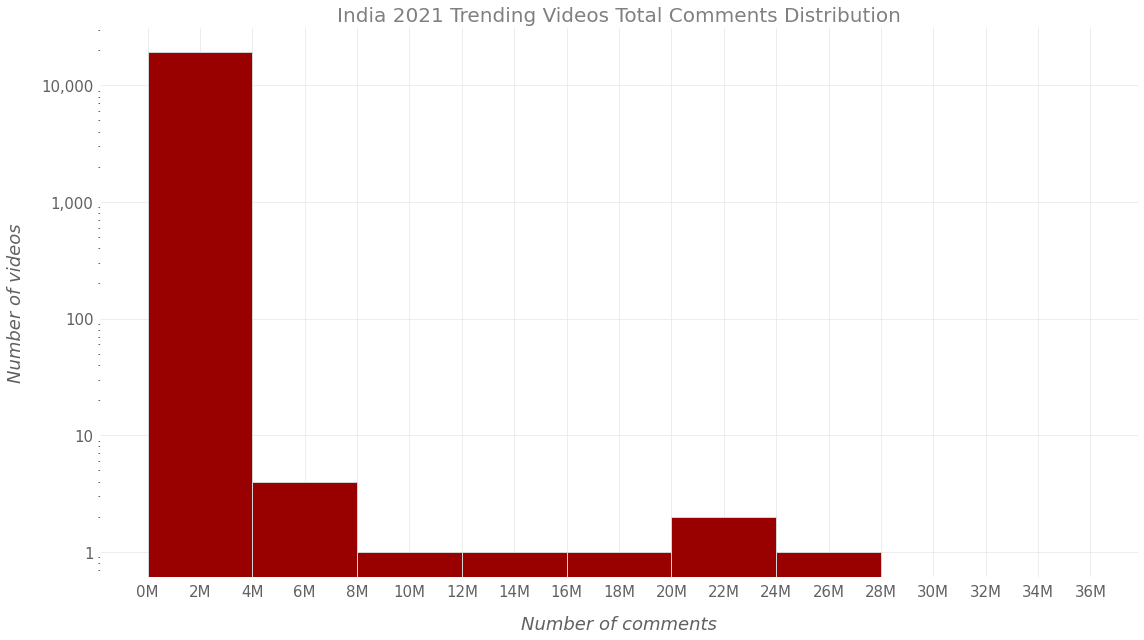

In [22]:
# plot comment count 
ax = india_df4['comment_count'].plot(kind='hist', bins=np.arange(0, 40e6, 4e6)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=india_col);
plot_conf(ax, xlbl='Number of comments', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('India 2021 Trending Videos Total Comments Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('india_comments.png',dpi=300)

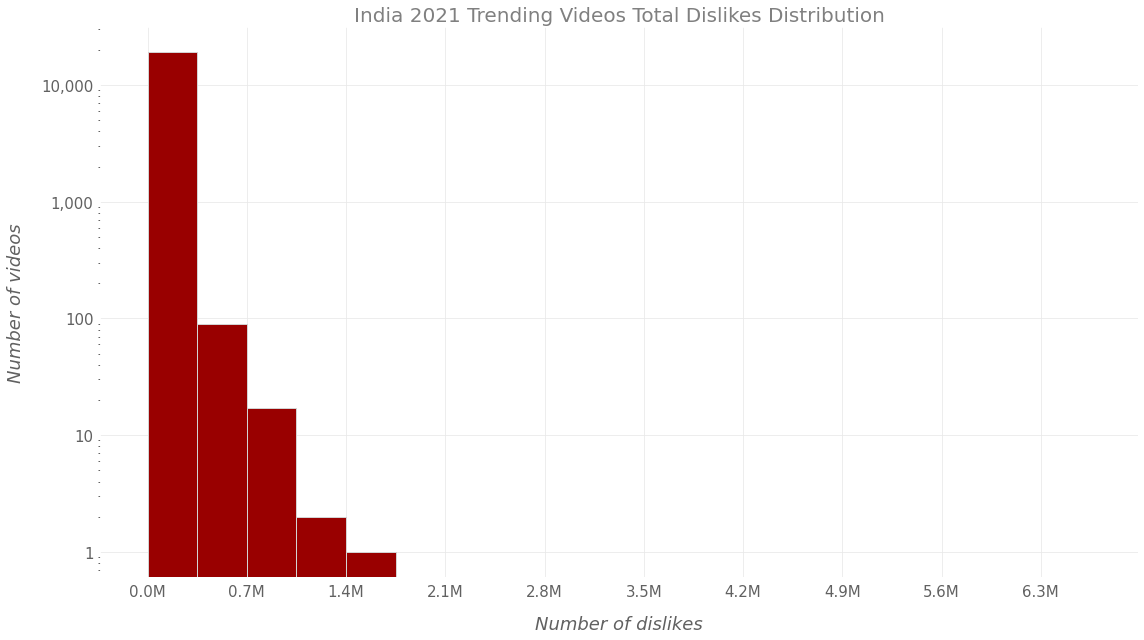

In [23]:
# plot dislikes count 
ax = india_df4['dislikes'].plot(kind='hist',bins=np.arange(0, 7e6, 3.5e5)-0.5, figsize=(16,9), 
                           logy=True, lw=1, ec='lightgray', color=india_col);
plot_conf(ax, xlbl='Number of dislikes', ylbl='Number of videos',ticklbl_size=15, lbl_size=18)
title_obj=plt.title('India 2021 Trending Videos Total Dislikes Distribution',fontdict={'fontsize':20})
plt.setp(title_obj, color='gray') 
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(700000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()
plt.savefig('India_dislikes.png',dpi=300)

## Sub-Task 5:What are the most common words in trending videos’ tags in 2021 in the US and India respectively?

### USA

### Data Prep

In [66]:
us_df4.head(50)

title_x  \
0                                                                  Turn into orbeez - Tutorial #Shorts   
1                                                                  Adele - Easy On Me (Official Video)   
2                                               SPIDER-MAN: NO WAY HOME - Official Teaser Trailer (HD)   
3                                                                             My hidden talent #shorts   
4         India claim stunning series win, end Australia's Gabba streak | Vodafone Test Series 2020-21   
5                                                                          Dice Stacks from $1 to $100   
6                                                        BTS (방탄소년단) 'Permission to Dance' Official MV   
7                                                                     Turn into egg - Tutorial #Shorts   
8                                              Israeli Iron Dome filmed intercepting rockets from Gaza   
9                                                                                  LISA - 'LALISA' M/V   
10                                                                  She is foxy but not enough #Shorts   
11                                                     SPIDER-MAN: NO WAY HOME - Official Trailer (HD)   
12                                                                   $456,000 Squid Game In Real Life!   
13                                                                MvRyhan Funny videos #tiktok #Shorts   
14                                                                    BTS (방탄소년단) 'Butter' Official MV   
15                                                                Bad Bunny - Yonaguni (Video Oficial)   
16                                                                          ROSÉ - 'On The Ground' M/V   
17                                                                              TWICE Alcohol-Free M/V   
18         Floyd Mayweather vs Logan Paul: Fight goes the distance [Highlights, recap] | CBS Sports HQ   
19                                                                 EXO 엑소 'Don't fight the feeling' MV   
20                                                                       Crazy STATIC TRICK! 😨 #shorts   
21                                                       JELLY FRUIT 🍎 CHALLENGE @BrianaSprinz #Shorts   
22   🥭Fresh Farm Fruit Eating | Tiktok China | Oddly Satisfying Ninja Fruit Cutting #shorts | Part 461   
23                                                   Billie Eilish - Lost Cause (Official Music Video)   
24  Golden Buzzer: Nightbirde's Original Song Makes Simon Cowell Emotional - America's Got Talent 2021   
25                                                 Bella Poarch - Build a B*tch (Official Music Video)   
26                                                   Anything You Can Fit In The Triangle I’ll Pay For   
27                                                                  INSANE strawberry trick! 😨 #shorts   
28                                                                       I Spent 50 Hours Buried Alive   
29                                                                      ITZY 마.피.아. In the morning M/V   
30                                                              Monster vs Dad. Dednahype show #shorts   
31                                                                   Money Plinko Challenge! 💰 #shorts   
32                                     Gera MX, Christian Nodal - Botella Tras Botella (Video Oficial)   
33                                                                 NCT DREAM 엔시티 드림 '맛 (Hot Sauce)' MV   
34                                                                  BTS (방탄소년단) 'Film out' Official MV   
35                    Highlights: Manchester United 0-5 Liverpool | Salah hat-trick stuns Old Trafford   
36                                                                      Oddly Satisfying Video #Shorts   
37                                     Fresh Squeezed OJ Fail #shor

In [67]:
# spilt tags with |
us_tag=us_df4['tags'].apply(lambda x : x.split('|'))
us_tag

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [[None]]
1                      [There ain’t no gold, In this river, That I’ve been washing my hands in forever, I know there is hope, In these waters, But I can’t bring myself to swim, When I am drowning, In this silence baby let me in, Go easy on me baby, I was still a child, Didn’t get the chance to, Feel the world around me, I had no time to choose, What I chose to do, So go easy on me, There ain’t no room, For things to change, When we are both so deeply, Stuck, our]
2        [spiderman, spiderman no way home, spider-man, spider-m

In [68]:
# extract tags and tags counts for lists
tag_dict={}

for x in us_tag:
    for i in x:
        if i in tag_dict:
            tag_dict[i]+=1
        else:
            tag_dict[i]=1
tag_dict

{'[None]': 2070,
 'There ain’t no gold': 3,
 'In this river': 3,
 'That I’ve been washing my hands in forever': 3,
 'I know there is hope': 3,
 'In these waters': 3,
 'But I can’t bring myself to swim': 3,
 'When I am drowning': 3,
 'In this silence baby let me in': 3,
 'Go easy on me baby': 3,
 'I was still a child': 3,
 'Didn’t get the chance to': 3,
 'Feel the world around me': 3,
 'I had no time to choose': 3,
 'What I chose to do': 3,
 'So go easy on me': 3,
 'There ain’t no room': 2,
 'For things to change': 2,
 'When we are both so deeply': 2,
 'Stuck': 2,
 'our': 2,
 'spiderman': 22,
 'spiderman no way home': 10,
 'spider-man': 19,
 'spider-man no way home': 12,
 'no way home teaser': 1,
 'no way home trailer': 8,
 'spiderman no way home preview': 1,
 'no way home clips': 1,
 'no way home scene': 1,
 'no way home sneak peak': 1,
 'official teaser trailer': 1,
 'spiderman official teaser trailer': 1,
 'no way home teaser trailer': 1,
 'tom holland': 13,
 'tom holland no way home

In [69]:
# delet none tags
tag_dict.pop('[None]')

2070

In [70]:
# store tags in a dict
tag_dict

{'There ain’t no gold': 3,
 'In this river': 3,
 'That I’ve been washing my hands in forever': 3,
 'I know there is hope': 3,
 'In these waters': 3,
 'But I can’t bring myself to swim': 3,
 'When I am drowning': 3,
 'In this silence baby let me in': 3,
 'Go easy on me baby': 3,
 'I was still a child': 3,
 'Didn’t get the chance to': 3,
 'Feel the world around me': 3,
 'I had no time to choose': 3,
 'What I chose to do': 3,
 'So go easy on me': 3,
 'There ain’t no room': 2,
 'For things to change': 2,
 'When we are both so deeply': 2,
 'Stuck': 2,
 'our': 2,
 'spiderman': 22,
 'spiderman no way home': 10,
 'spider-man': 19,
 'spider-man no way home': 12,
 'no way home teaser': 1,
 'no way home trailer': 8,
 'spiderman no way home preview': 1,
 'no way home clips': 1,
 'no way home scene': 1,
 'no way home sneak peak': 1,
 'official teaser trailer': 1,
 'spiderman official teaser trailer': 1,
 'no way home teaser trailer': 1,
 'tom holland': 13,
 'tom holland no way home': 1,
 'zendaya':

In [71]:
# sort tags
sort_dict2=sorted(tag_dict.items(), key = lambda i: i[1],reverse=True)
sort_dict2

[('funny', 783),
 ('minecraft', 553),
 ('comedy', 496),
 ('challenge', 366),
 ('vlog', 260),
 ('gaming', 246),
 ('news', 239),
 ('rap', 197),
 ('highlights', 196),
 ('fortnite', 192),
 ('animation', 191),
 ('how to', 189),
 ('music', 189),
 ('football', 188),
 ('2021', 187),
 ('family friendly', 181),
 ('tiktok', 177),
 ('Minecraft', 175),
 ('video', 173),
 ('sports', 172),
 ('new', 172),
 ('reaction', 169),
 ('game', 158),
 ('family', 156),
 ('NBA', 156),
 ('hip hop', 154),
 ('fun', 145),
 ('minecraft challenge', 141),
 ('dream', 129),
 ('shorts', 128),
 ('Rap', 128),
 ('trailer', 123),
 ('gameplay', 122),
 ('science', 121),
 ('soccer', 121),
 ('Football', 119),
 ('minecraft but', 113),
 ('Records', 112),
 ('diy', 110),
 ('interview', 109),
 ('live', 108),
 ('mine craft', 108),
 ('Basketball', 108),
 ('Hip Hop', 106),
 ('tutorial', 106),
 ('review', 102),
 ('nba', 102),
 ('marvel', 100),
 ('fortnite battle royale', 100),
 ('parody', 95),
 ('yt:cc=on', 94),
 ('espn', 94),
 ('prank', 92

### Plot Wordcloud

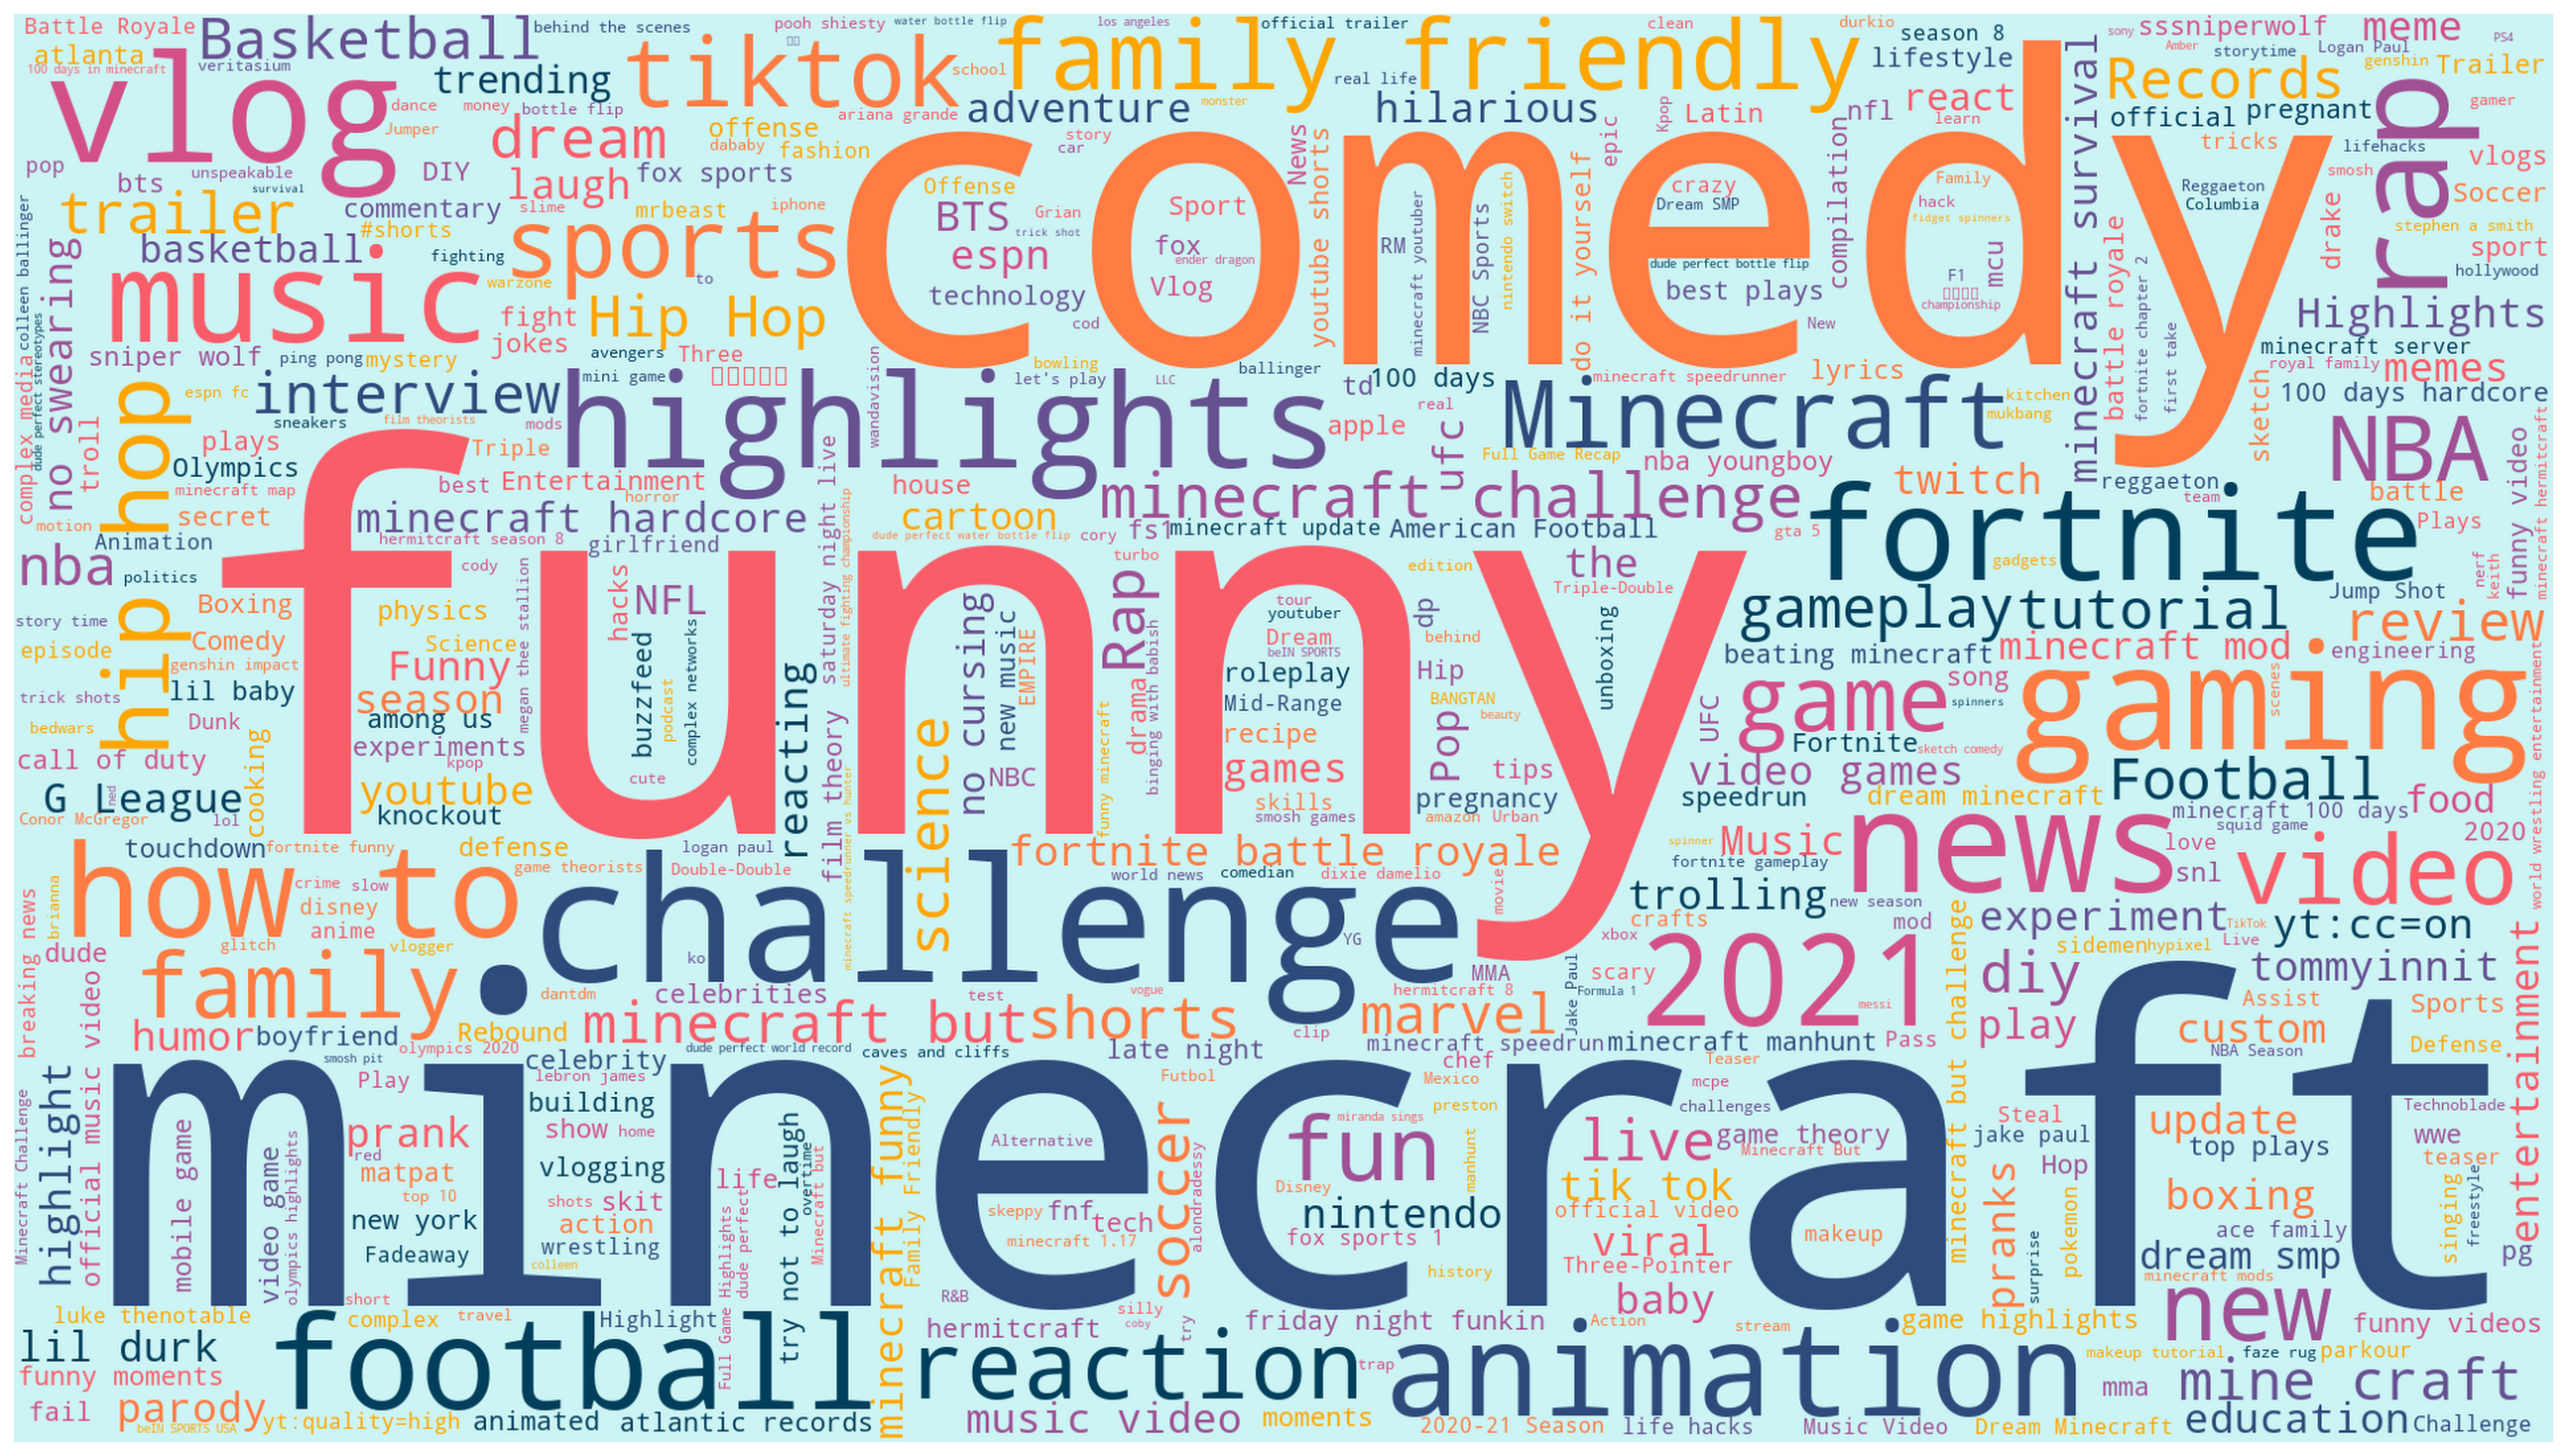

In [72]:
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
    return colors[len(word)%len(colors)]

WC_MAX_FZ = 400 
WC_RS = 0.5

wc = wordcloud.WordCloud(width=1920, height=1080, collocations=False,
                         background_color="#CCF4F4", color_func=col_func, 
                         max_words=500, max_font_size=WC_MAX_FZ, 
                         relative_scaling=WC_RS,random_state=10
                        ).generate_from_frequencies(tag_dict)

fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='lanczos')
ax.axis("off")
plt.tight_layout(pad=0)
plt.savefig('US_tages.png',dpi=300)

## India

### Data Prep

In [73]:
# spilt tags with |
india_df4.head(50)

title_x  \
0   KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena Tandon|Srinidhi Shetty|Prashanth Neel|Vijay Kiragandur   
1          Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sanon | Ammy Virk | BPraak | Jaani | Arvindr Khaira   
2                                                                Paytm IPL 2021 Ad - The Salon (English)   
3                                                          BTS (방탄소년단) 'Permission to Dance' Official MV   
4                                                                       Turn into egg - Tutorial #Shorts   
5                                                                                    LISA - 'LALISA' M/V   
6                                                                     She is foxy but not enough #Shorts   
7                                                                   When the cheating went wrong #Shorts   
8                      Badshah - Paani Paani | Jacqueline Fernandez | Aastha Gill | Official Music Video   
9                        Guru Randhawa: Nain Bengali (Official Video) David Zennie | Vee | Bhushan Kumar   
10                            Bachpan Ka Pyaar (Official Video) Badshah, Sahdev Dirdo, Aastha Gill, Rico   
11    Don’t be Oversmart 😎 ~ You Can’t Change your Destiny 😂 ~ @Priyal Kukreja  Dushyant Kukreja #shorts   
12                                                                      BTS (방탄소년단) 'Butter' Official MV   
13                                                             Aise kon Chori karta hai🙄 #imkavy #Shorts   
14  Bedardi Se Pyaar Ka Song|Jubin N,Meet B,Manoj M|Gurmeet C,Sherine S,Kaashish V,Altamash F| Bhushan K   
15                                                         JELLY FRUIT 🍎 CHALLENGE @BrianaSprinz #Shorts   
16    Why Children are considered as Gifts of Gods 🕉 ? A Motivational Story 😊 ~ Dushyant Kukreja #shorts   
17                                                                     $456,000 Squid Game In Real Life!   
18       Let's just have fun with your loved ones!😎 #PermissiontoDance Challenge only on YouTube #Shorts   
19                                                                                TWICE Alcohol-Free M/V   
20                                               isko mere chupaye hue pese hmesha mil jate h 😂😂 #shorts   
21                                                                         Crazy STATIC TRICK! 😨 #shorts   
22  Chhor Denge: Parampara Tandon | Sachet-Parampara | Nora Fatehi, Ehan Bhat | Arvindr K, Bhushan Kumar   
23                                                                            ROSÉ - 'On The Ground' M/V   
24                                                                   Turn into orbeez - Tutorial #Shorts   
25                                     Join the BTS #PermissiontoDance Challenge only on YouTube #Shorts   
26              Surja Ki Mashoor Dal🤩🤩 Most Eco Friendly Food❤❤ #streetfood #haridwar #rishikesh #shorts   
27                                                                Monster vs Dad. Dednahype show #shorts   
28                                                                   EXO 엑소 'Don't fight the feeling' MV   
29   Lut Gaye (Full Song) Emraan Hashmi, Yukti | Jubin N, Tanishk B, Manoj M | Bhushan K | Radhika-Vinay   
30                      America 🇺🇸 Vs India 🇮🇳 ~ When going out from home 🏡 😂 ~ Dushyant Kukreja #shorts   
31  Baarish Ban Jaana (Official Video) Payal Dev, Stebin Ben | Hina Khan, Shaheer Sheikh | Kunaal Vermaa   
32  Saiyaan Ji ► Yo Yo Honey Singh, Neha Kakkar|Nushrratt Bharuccha|  Lil G, Hommie D| Mihir G|Bhushan K   
33                                                                     Money Plinko Challenge! 💰 #shorts   
34          Insaniyat shayad ab bachho me he rah gai hai 😭😭#emotinalstory #sadstory #stories #heroindori   
35                                                                                           Oh No.... 😂   
36  Dil Galti Kar Baitha Hai | Meet Bros Ft. Jubin Nautiyal | Mouni Roy | Manoj M | Ashish P | Bhusha

In [74]:
# extract tags and tags counts for lists
india_tag=india_df4['tags'].apply(lambda x : x.split('|'))
india_tag_dict={}

for x in india_tag:
    for i in x:
        if i in india_tag_dict:
            india_tag_dict[i]+=1
        else:
            india_tag_dict[i]=1
india_tag_dict.pop('[None]')
india_tag_dict

{'Hombale films': 13,
 'hombale': 13,
 'hombale films kannada': 9,
 'hombale films kgf 2': 5,
 'kgf 2': 8,
 'yash': 14,
 'prashanth neel': 6,
 'srinidhi shetty': 5,
 'kgf 2 teaser': 6,
 'kgf 2 update': 4,
 'kgf chapter 2': 8,
 'Sanjay Dutt': 62,
 'Raveena Tandon': 7,
 'Prakash Raj': 8,
 'Rocking Star Yash': 5,
 'kgf chapter 2 teaser': 6,
 'kgf': 18,
 'kgf2': 8,
 'kgf 2 kannada': 3,
 'yash kgf': 5,
 'kgf teaser': 4,
 'sanjay dutt adheera': 3,
 'prashant neel': 3,
 'rocky bhai': 6,
 'kgf updates': 4,
 'adheera sanjay dutt': 4,
 'yash birthday': 3,
 'yash movies': 3,
 'kgf chapter 2 trailer': 6,
 'kgf 2 trailer': 6,
 'kgf trailer': 4,
 'yash birthday celebration': 4,
 'filhall 2': 6,
 'Filhaal 2': 5,
 'Filhaal': 3,
 'mohabbat': 7,
 'Mohabbat karte ho': 2,
 'akshay kumar': 17,
 'nupur sanon': 5,
 'Bpraak': 4,
 'Bpraak filhaal 2': 2,
 'jaani': 25,
 'b praak new song': 19,
 'akshay kumar filhaal': 2,
 'arvindr khaira': 11,
 'ammy virk new song': 12,
 'latest hindi songs': 36,
 'latest punjab

In [75]:
# sort tags
sort_dict1=sorted(india_tag_dict.items(), key = lambda i: i[1],reverse=True)
sort_dict1

[('comedy', 880),
 ('comedy show', 739),
 ('bigg boss', 577),
 ('hindi shows', 548),
 ('trending', 530),
 ('funny', 512),
 ('crime show', 503),
 ('colors tv new serial', 502),
 ('colors tv promo', 501),
 ('colors tv serials all', 496),
 ('colors tv khatron ke khiladi', 496),
 ('कलर्स टीवी', 496),
 ('horror show', 496),
 ('colors tv naagin', 460),
 ('entertainment', 455),
 ('jethalal', 441),
 ('தமிழ்', 441),
 ('தொலைக்காட்சி', 438),
 ('Star Vijay TV', 438),
 ('Vijay TV', 438),
 ('Tamil TV', 437),
 ('Tamil Shows', 430),
 ('vlog', 427),
 ('तारक मेहता', 402),
 ('reality show', 400),
 ('Star', 397),
 ('hindi comedy show', 389),
 ('tapu sena', 357),
 ('Vijay', 353),
 ('shakti', 353),
 ('விஜய்', 351),
 ('டிவி', 351),
 ('Redefining Entertainment', 350),
 ('voot', 338),
 ('sab tv funny show', 335),
 ('babita', 324),
 ('sab tv channel', 318),
 ('love', 301),
 ('2021', 296),
 ('shorts', 294),
 ('vlogs', 289),
 ('funny video', 281),
 ('swaragini', 279),
 ('hotstar', 278),
 ('zee5', 277),
 ('comedy 

### Plot Wordcloud

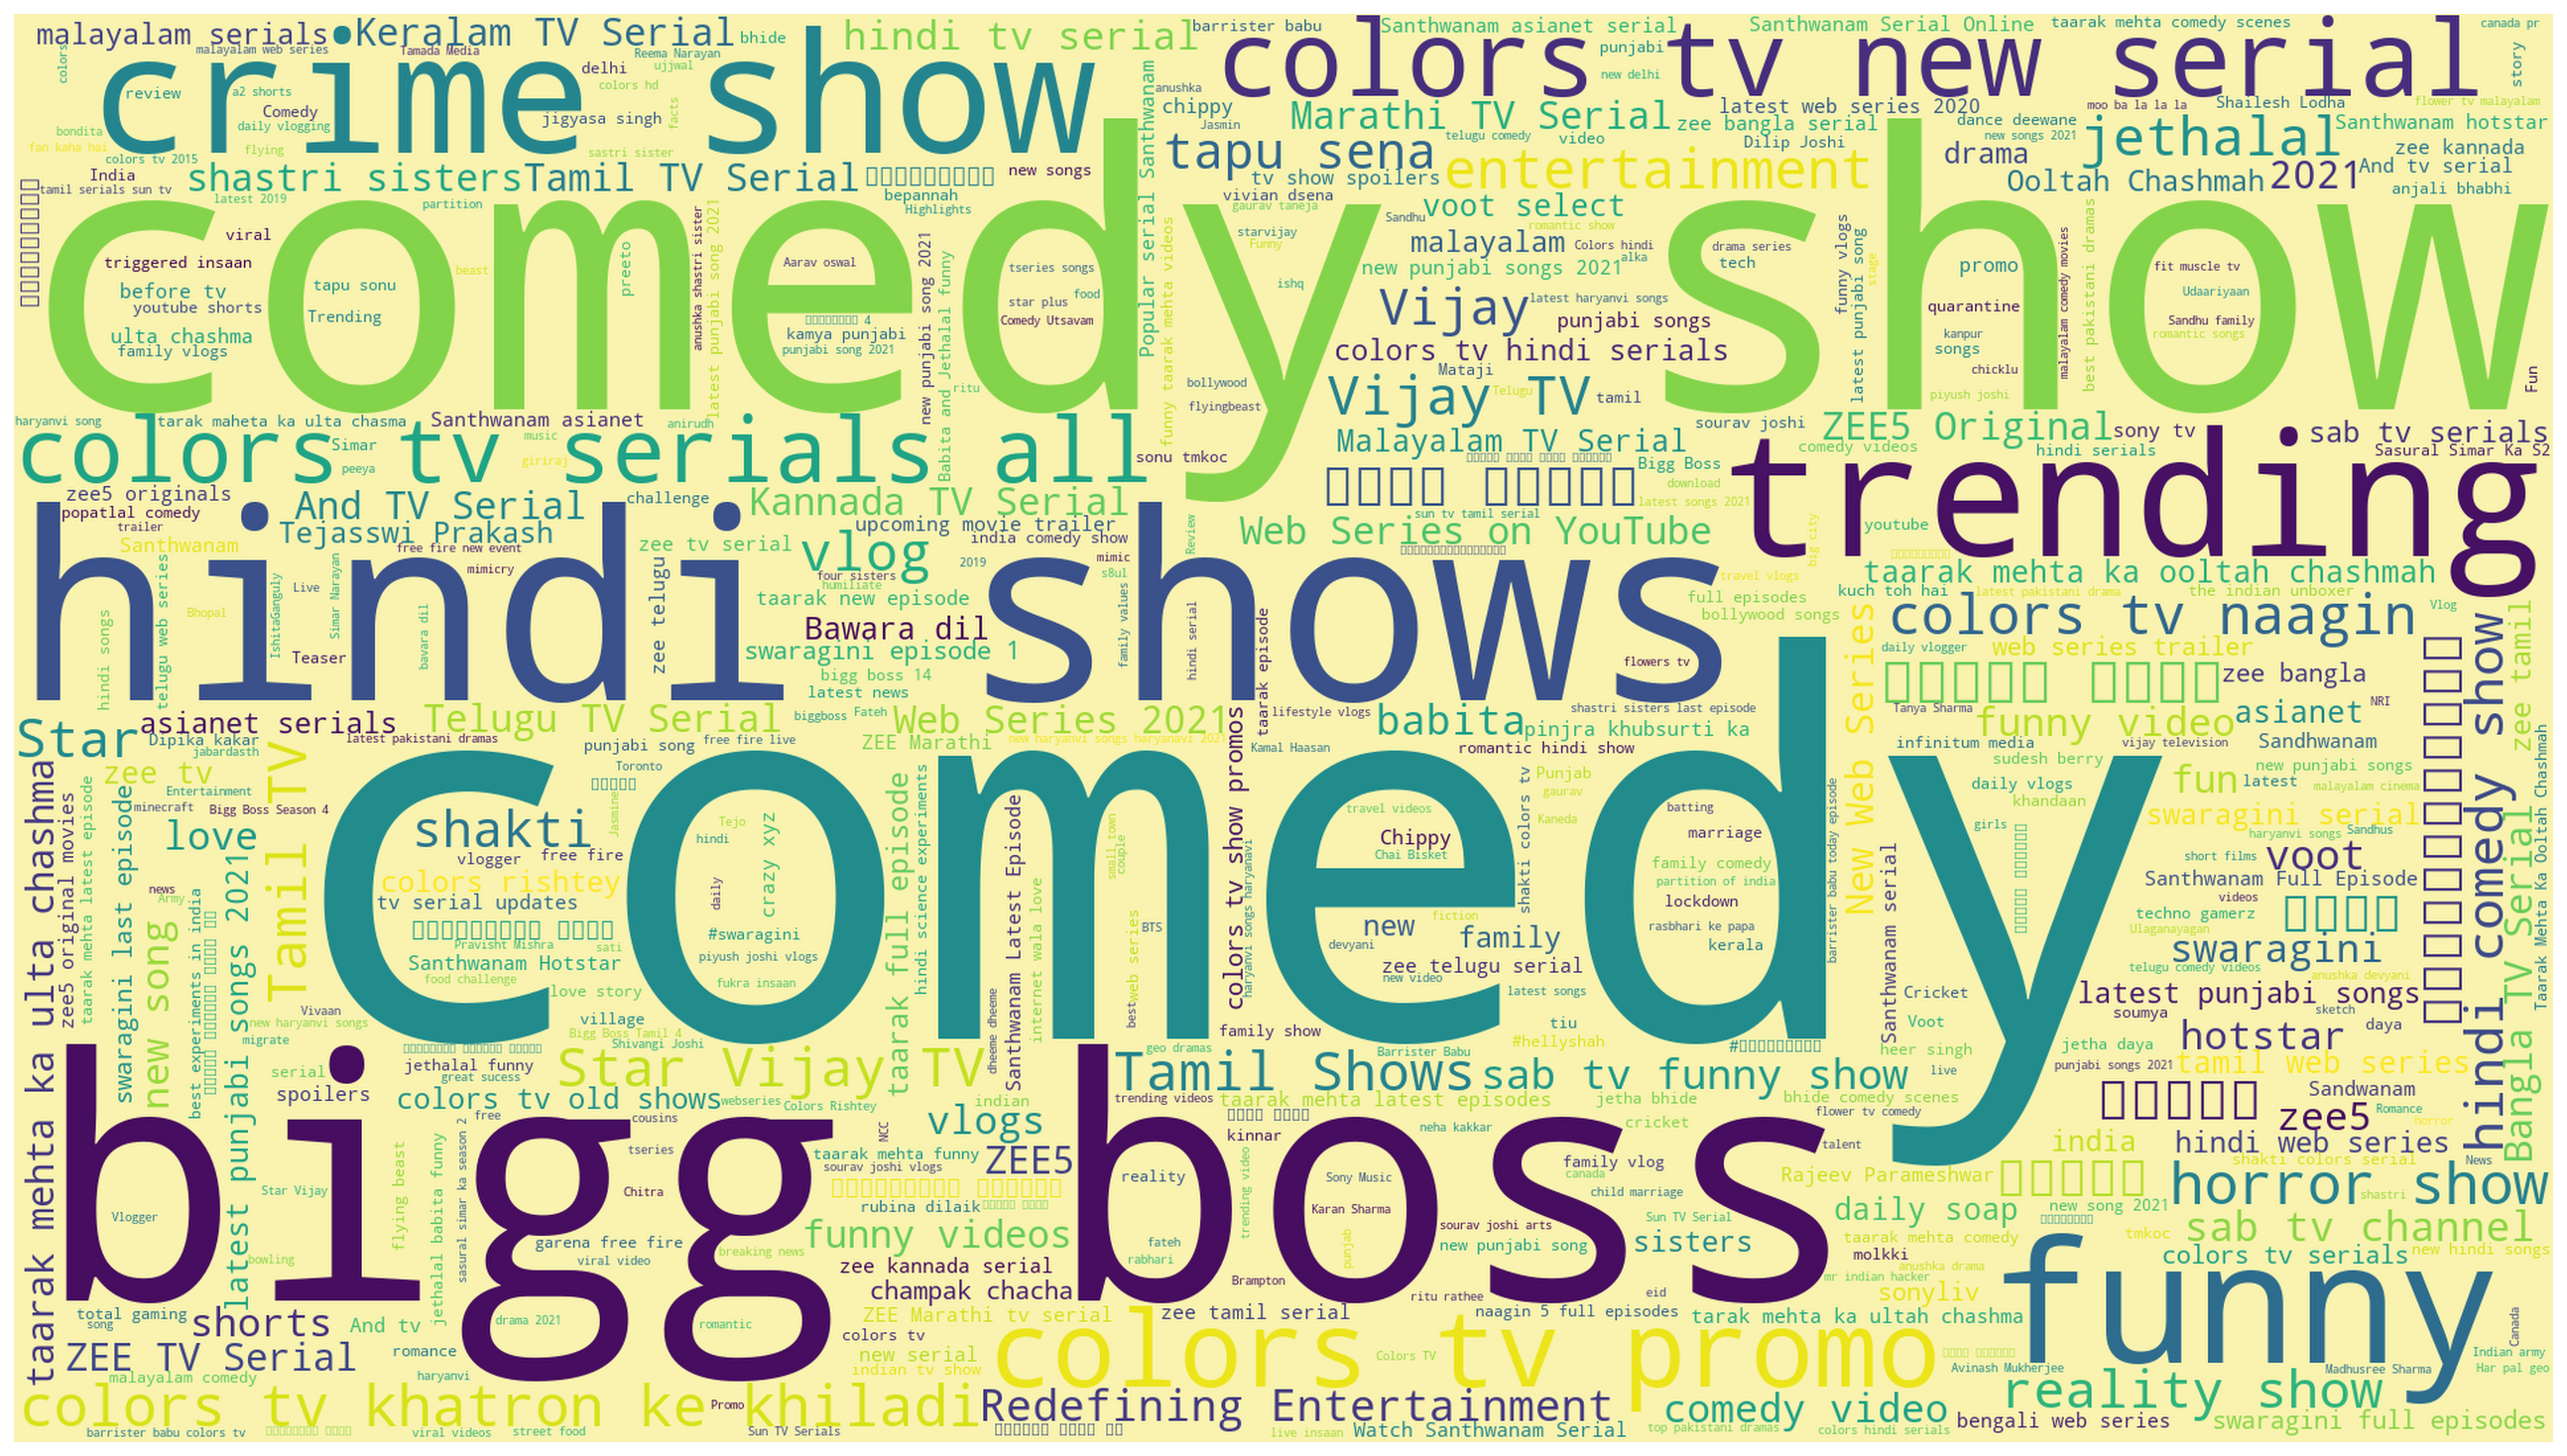

In [76]:
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
    return colors[len(word)%len(colors)]

WC_MAX_FZ = 400 
WC_RS = 0.5

wc = wordcloud.WordCloud(width=1920, height=1080, collocations=False,
                         background_color="#F9F3AF", 
                         max_words=500, max_font_size=WC_MAX_FZ, 
                         relative_scaling=WC_RS,random_state=10
                        ).generate_from_frequencies(india_tag_dict)

fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wc, interpolation='lanczos')
ax.axis("off")
plt.tight_layout(pad=0)
plt.savefig('India_tags.png',dpi=300)